In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: dougblizz
"""

import pandas as pd
import ipynb.fs.full.funct as funct
import os
import re
%matplotlib inline

# Import data

### df_enhanced

In [7]:
df_enhanced = pd.read_csv("../data/twitter-archive-enhanced.csv")
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### df_predictions

In [8]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

df_predictions = funct.create_df_images_prediction(url)
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### df_tweets

In [9]:
if not os.path.isfile('../data/tweet_json.txt'):
    print("file tweet_json.txt not exist, please send keys")
    funct.get_tweets_data(df_enhanced)
else:
    print("file tweet_json.txt exist")
    
#Parse "tweet_json.txt" to dataframe
df_tweets = funct.parse_api_result_to_dataframe()
df_tweets.head()

file tweet_json.txt exist


,contributors,coordinates,created_at,display_text_range,favorite_count,favorited,full_text,geo,id,id_str,...,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweeted_status,quoted_status
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",36054.0,0.0,This is Phineas. He's a mystical boy. Only eve...,None,8.924206e+17,892420643555336193,...,0.0,7676.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",31097.0,0.0,This is Tilly. She's just checking pup on you....,None,8.921774e+17,892177421306343426,...,0.0,5675.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",23411.0,0.0,This is Archie. He is a rare Norwegian Pouncin...,None,8.918152e+17,891815181378084864,...,0.0,3763.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",39325.0,0.0,This is Darla. She commenced a snooze mid meal...,None,8.916896e+17,891689557279858688,...,0.0,7850.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",37565.0,0.0,This is Franklin. He would like you to stop ca...,None,8.913276e+17,891327558926688256,...,0.0,8446.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN


### Create copies

In [10]:
df_enhanced_clean = df_enhanced.copy()
df_predictions_clean = df_predictions.copy()
df_tweets_clean = df_tweets.copy()


# Assessing df_enhanced_clean

In [11]:
df_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#See different values in source
df_enhanced_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
#See name values
df_enhanced_clean['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Amy           1
Howie         1
Jarod         1
Rey           1
Humphrey      1
Name: name, Length: 957, dtype: int64

In [16]:
#See "rating_numerator" values
df_enhanced_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
#See if "rating_denominator" have values equals to 0
df_enhanced_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Quality issues in df_enhanced_clean

- We need to remove the rows that have that have data in retweeted (181) and the reply (78).
- After removing the retweets and replies, we can remove the useless columns(**in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**).
- In the **source** column we observe that we only need the data source, in a few words we can discard the rest.
- In the **name** column we need to remove the values ​​"None" and the values ​​in lowercase since they are not non-dog names.
- Create the **ratings** column, which would be the division between **rating_numerator** and **rating_denominator**
- In the new **dog_stages** column, we change the values ​​"None" to None.
- We check with the function irregular values, that there are names with accents, but since they are not considered invalid names, the pattern was changed to accept accents.

## Tidiness issues in df_enhanced_clean

- Create a single column that contains the stages for each dog, for this we join the columns (**doggo, pupper, puppo, floofer**)

## Data enrichment in df_enhanced_clean

- Using the **timestamp** column, we create the **hour** and **full_week** columns, to detail the hours and days that tweets

# Clean df_enhanced copy

### Remove retweets in df_enhanced_copy

In [18]:
df_enhanced_clean = df_enhanced_clean[df_enhanced_clean['retweeted_status_id'].isnull()]

### Remove replies in df_enhanced_copy

In [19]:
df_enhanced_clean = df_enhanced_clean[df_enhanced_clean['in_reply_to_status_id'].isnull()]

### Drop unnecessary columns

In [20]:
#Var for unnecessary_enhanced_columns
unnecessary_enhanced_columns = ['in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp']

In [21]:
df_enhanced_clean.drop(columns = unnecessary_enhanced_columns, inplace = True)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Use Regex to clear the source column

In [22]:
pattern = ">(.*)</"
df_enhanced_clean['source'] = df_enhanced_clean.apply(lambda x: str(re.findall(pattern, x['source'])).strip("['']"), axis = 1)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Drop rows with name = None

In [23]:
df_enhanced_clean = df_enhanced_clean[df_enhanced_clean['name'] != 'None']

### Create new column ratings

In [24]:
df_enhanced_clean['ratings'] = df_enhanced_clean.apply(lambda x: x['rating_numerator']/x['rating_denominator'], axis = 1)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


### Now we can remove rating_numerator and denominator columns

In [25]:
df_enhanced_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace = True)


### Delete names in lowercase

In [31]:
df_enhanced_clean = df_enhanced_clean[~df_enhanced_clean['name'].str.islower()]
df_enhanced_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
     

### Now we need to make one column for dogs stages

In [26]:
df_enhanced_clean['dog_stages'] = df_enhanced_clean.apply(lambda x: funct.make_dog_stages(x), axis = 1)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,ratings,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2,None


### Drop (doggo-floofer-pupper-puppo) columns

In [33]:
df_enhanced_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

### Check if column "Name" have invalid characters

In [35]:
df_enhanced_clean['invalid_characters'] = df_enhanced_clean.apply(lambda x: funct.check_invalid_characters(x['name']), axis = 1)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stages,invalid_characters
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,False
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,False
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,False


### the first time I checked with function (check_invalid_characters) I found these values:
- 915       Devón
- 1172     Ralphé
- 1196     Flávio
- 1465    Oliviér
- 1559      Frönq
- 1597     Flávio
- 2164    Oliviér
- 2195     Amélie
- 2217     Gòrdón 

**As we can see they are not invalid names so we modify the pattern for invalid names**

### Now we can remove "invalid_characters" column

In [36]:
df_enhanced_clean.drop(columns = 'invalid_characters', inplace = True)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None


### We want to know the days of the week of the tweets, and if they are the weekends for future viewing, and the hours for another graph out of curiosity

In [38]:
#pass to datetime
df_enhanced_clean['timestamp'] = pd.to_datetime(df_enhanced_clean['timestamp'])
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419 entries, 0 to 2346
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1419 non-null   int64              
 1   timestamp      1419 non-null   datetime64[ns, UTC]
 2   source         1419 non-null   object             
 3   text           1419 non-null   object             
 4   expanded_urls  1419 non-null   object             
 5   name           1419 non-null   object             
 6   ratings        1419 non-null   float64            
 7   dog_stages     192 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 99.8+ KB


In [40]:
#Get day
df_enhanced_clean['day'] = df_enhanced_clean['timestamp'].dt.day_name()
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stages,day
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,Saturday


In [41]:
#Get hour (for see)
df_enhanced_clean['hour'] = df_enhanced_clean['timestamp'].dt.hour
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stages,day,hour
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,Tuesday,16
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,Tuesday,0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,Monday,0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,Sunday,15
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,Saturday,16


In [42]:
#Now we need to know if it's weekday or weekend
df_enhanced_clean['full_week'] = df_enhanced_clean.apply(lambda x: funct.weekend_or_weekday(x), axis = 1)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stages,day,hour,full_week
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,Tuesday,16,weekday
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,Tuesday,0,weekday
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,Monday,0,weekday
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,Sunday,15,weekend
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,Saturday,16,weekend


In [43]:
#Now we can remove "day" column
df_enhanced_clean.drop(columns = 'day', inplace = True)
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stages,hour,full_week
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,16,weekday
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,0,weekday
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,0,weekday
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,15,weekend
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,16,weekend


# Assessing df_predictions_clean

In [33]:
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Duplicates? Not

In [35]:
sum(df_predictions_clean['tweet_id'].duplicated())

0

## Quality issues in df_predictions_clean

- We verify that there are no duplicates in the df.
- Remove unnecessary columns


# Clean df_predictions_clean

### I think we dont need column "img_num"

In [38]:
df_predictions_clean.drop(columns = 'img_num', inplace = True)
df_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Assessing df_tweets_clean


In [39]:
df_tweets_clean.head()

,contributors,coordinates,created_at,display_text_range,favorite_count,favorited,full_text,geo,id,id_str,...,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweeted_status,quoted_status
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",36054.0,0.0,This is Phineas. He's a mystical boy. Only eve...,None,8.924206e+17,892420643555336193,...,0.0,7676.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",31097.0,0.0,This is Tilly. She's just checking pup on you....,None,8.921774e+17,892177421306343426,...,0.0,5675.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",23411.0,0.0,This is Archie. He is a rare Norwegian Pouncin...,None,8.918152e+17,891815181378084864,...,0.0,3763.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",39325.0,0.0,This is Darla. She commenced a snooze mid meal...,None,8.916896e+17,891689557279858688,...,0.0,7850.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",37565.0,0.0,This is Franklin. He would like you to stop ca...,None,8.913276e+17,891327558926688256,...,0.0,8446.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,NaN,NaN,NaN,NaN,NaN


In [40]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   contributors                   0 non-null      object 
 1   coordinates                    0 non-null      object 
 2   created_at                     2332 non-null   object 
 3   display_text_range             2332 non-null   object 
 4   favorite_count                 2332 non-null   float64
 5   favorited                      2332 non-null   float64
 6   full_text                      2332 non-null   object 
 7   geo                            0 non-null      object 
 8   id                             2332 non-null   float64
 9   id_str                         2332 non-null   object 
 10  in_reply_to_screen_name        77 non-null     object 
 11  in_reply_to_status_id          77 non-null     object 
 12  in_reply_to_status_id_str      77 non-null     o

## Quality issues in df_tweets_clean

- We are going to rename some columns to more appropriate names for the final product.
- Remove unnecessary columns.
- We changed the data type of the **tweet_id** column to int, to avoid problems when doing the crossing.
- In the **tweet_length** column we only care, we are interested in knowing how long it is and showing it in a more friendly way.
- The column of **languages** ​​we need to adapt it to the names of each language and not its code


# Clean df_tweets_clean

### We only need some columns, then we can remove the ones we don't need.

In [41]:
df_tweets_clean = df_tweets_clean[['id_str', 'favorite_count', 'retweet_count', 'display_text_range', 'lang']]
df_tweets_clean.head()

,id_str,favorite_count,retweet_count,display_text_range,lang
0,892420643555336193,36054.0,7676.0,"[0, 85]",en
1,892177421306343426,31097.0,5675.0,"[0, 138]",en
2,891815181378084864,23411.0,3763.0,"[0, 121]",en
3,891689557279858688,39325.0,7850.0,"[0, 79]",en
4,891327558926688256,37565.0,8446.0,"[0, 138]",en


### #Rename columns

In [42]:
df_tweets_clean.rename(columns={'id_str':'tweet_id', 'lang':'language', 'display_text_range':'tweet_length'}, inplace=True)
df_tweets_clean.head()

,tweet_id,favorite_count,retweet_count,tweet_length,language
0,892420643555336193,36054.0,7676.0,"[0, 85]",en
1,892177421306343426,31097.0,5675.0,"[0, 138]",en
2,891815181378084864,23411.0,3763.0,"[0, 121]",en
3,891689557279858688,39325.0,7850.0,"[0, 79]",en
4,891327558926688256,37565.0,8446.0,"[0, 138]",en


### Pass tweet_id float to int

In [43]:
df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(int)
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2332 non-null   int64  
 1   favorite_count  2332 non-null   float64
 2   retweet_count   2332 non-null   float64
 3   tweet_length    2332 non-null   object 
 4   language        2332 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 91.2+ KB


### Fix tweet_length column, add 1 as the tweet count starts from 0

In [44]:
df_tweets_clean['tweet_length'] = df_tweets_clean.apply(lambda x: x['tweet_length'][1] + 1, axis = 1)
df_tweets_clean.head()

,tweet_id,favorite_count,retweet_count,tweet_length,language
0,892420643555336193,36054.0,7676.0,86,en
1,892177421306343426,31097.0,5675.0,139,en
2,891815181378084864,23411.0,3763.0,122,en
3,891689557279858688,39325.0,7850.0,80,en
4,891327558926688256,37565.0,8446.0,139,en


### Fix language column, first see values in column

In [45]:
df_tweets_clean['language'].value_counts()

en     2314
und       7
nl        3
in        3
et        1
ro        1
tl        1
es        1
eu        1
Name: language, dtype: int64

### Create dict with lang avatibles in twitter

In [46]:
language = {'en':'English', 
            'nl':'Dutch', 
            'ro':'Romanian', 
            'es':'Spanish', 
            'eu':'Undefined', 
            'et':'Undefined', 
            'tl':'Undefined',
            'und':'Undefined',
            'in':'Undefined'}

### Replace dict values into column "language"

In [47]:
df_tweets_clean.replace({"language": language}, inplace = True)
df_tweets_clean.head()

,tweet_id,favorite_count,retweet_count,tweet_length,language
0,892420643555336193,36054.0,7676.0,86,English
1,892177421306343426,31097.0,5675.0,139,English
2,891815181378084864,23411.0,3763.0,122,English
3,891689557279858688,39325.0,7850.0,80,English
4,891327558926688256,37565.0,8446.0,139,English


## Tidyness issues in twitter_archive_master

- As we observe we need to join the data of these 3 datasets to produce a final one, for this we are going to use the tweet_id column, making an inner join to our main file df_enhanced_clean, which is the one that has the data we want.

## Data enrichment in twitter_archive_master

- We are going to use the first prediction that has a value of True, otherwise we will put the closest that would be p1, this helps us to have a single column with the dog's prediction and another column for its precision
- We are also going to create another column using the same logic as the predictions, but this time to find out if the model found it to be a dog or not, and thus see its reliability.

# Merge dataframes and clean final dataframe

### Create merged df

In [48]:
twitter_archive_master = pd.merge(pd.merge(df_enhanced_clean, df_predictions_clean, on = 'tweet_id'), df_tweets_clean, on = 'tweet_id')
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,tweet_length,language
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,36054.0,7676.0,86,English
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,31097.0,5675.0,139,English
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,23411.0,3763.0,122,English
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,39325.0,7850.0,80,English
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37565.0,8446.0,139,English


### Create new column for predicted dogs

In [49]:
twitter_archive_master['predicted_dog'] = twitter_archive_master.apply(lambda x: funct.predicted_dog(x), axis = 1)
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,tweet_length,language,predicted_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,0.085851,False,banana,0.076110,False,36054.0,7676.0,86,English,the closest prediction was: orange
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,0.090647,True,papillon,0.068957,True,31097.0,5675.0,139,English,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,0.078253,True,kelpie,0.031379,True,23411.0,3763.0,122,English,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,0.168086,True,spatula,0.040836,False,39325.0,7850.0,80,English,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,37565.0,8446.0,139,English,basset


### Create new column for predicted precision

In [50]:
twitter_archive_master['predicted_precision'] = twitter_archive_master.apply(lambda x: funct.predicted_precision(x), axis = 1)
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,tweet_length,language,predicted_dog,predicted_precision
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,False,banana,0.076110,False,36054.0,7676.0,86,English,the closest prediction was: orange,0.097049
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,True,papillon,0.068957,True,31097.0,5675.0,139,English,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,True,kelpie,0.031379,True,23411.0,3763.0,122,English,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,True,spatula,0.040836,False,39325.0,7850.0,80,English,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,True,German_short-haired_pointer,0.175219,True,37565.0,8446.0,139,English,basset,0.555712


### New colum, to know if it's a dog or not

In [51]:
twitter_archive_master['is_dog'] = twitter_archive_master.apply(lambda x: 'it´s a dog' if x['predicted_dog'].find('the closest prediction was:') else 'it´s not a dog', axis = 1)
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,tweet_length,language,predicted_dog,predicted_precision,is_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,banana,0.076110,False,36054.0,7676.0,86,English,the closest prediction was: orange,0.097049,it´s not a dog
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,papillon,0.068957,True,31097.0,5675.0,139,English,Chihuahua,0.323581,it´s a dog
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,kelpie,0.031379,True,23411.0,3763.0,122,English,Chihuahua,0.716012,it´s a dog
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,spatula,0.040836,False,39325.0,7850.0,80,English,Labrador_retriever,0.168086,it´s a dog
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,German_short-haired_pointer,0.175219,True,37565.0,8446.0,139,English,basset,0.555712,it´s a dog


### Drop prediction columns

In [52]:
prediction_columns = ['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']
twitter_archive_master.drop(columns = prediction_columns, inplace = True)
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,ratings,jpg_url,favorite_count,retweet_count,tweet_length,language,predicted_dog,predicted_precision,is_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,36054.0,7676.0,86,English,the closest prediction was: orange,0.097049,it´s not a dog
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,31097.0,5675.0,139,English,Chihuahua,0.323581,it´s a dog
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23411.0,3763.0,122,English,Chihuahua,0.716012,it´s a dog
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,39325.0,7850.0,80,English,Labrador_retriever,0.168086,it´s a dog
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37565.0,8446.0,139,English,basset,0.555712,it´s a dog


#### Let's see what is the percentage of success in the column of is_dog

In [53]:
#First see value_counts
twitter_archive_master['is_dog'].value_counts()

it´s a dog        1179
it´s not a dog     163
Name: is_dog, dtype: int64

In [60]:
# prediction precision according to the sample
a_dog = twitter_archive_master['is_dog'].value_counts()[0]
not_a_dog = twitter_archive_master['is_dog'].value_counts()[1]
print("prediction precision according to the sample: {} %".format(a_dog * 100 / (a_dog + not_a_dog)))

prediction precision according to the sample: 87.85394932935917 %


# Let's do some visualizations

### Days when users send more tweets

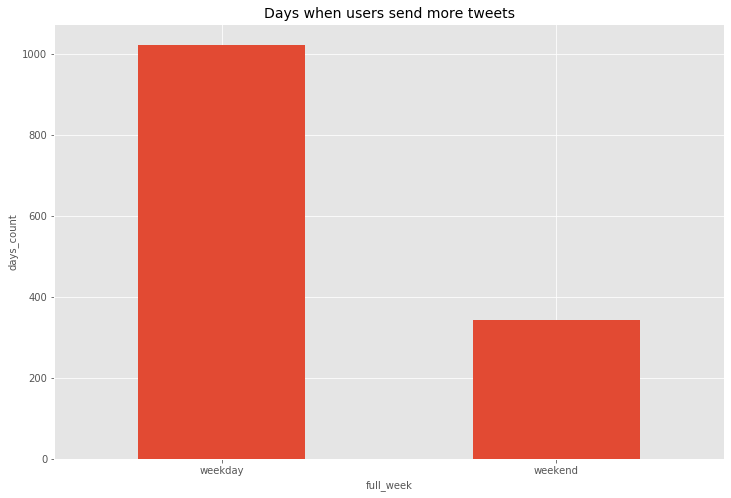

In [66]:
funct.simple_plot(twitter_archive_master,
                  'full_week',
                  "Days when users send more tweets",
                  'full_week',
                  'days_count')  

### Hours when users send more tweets

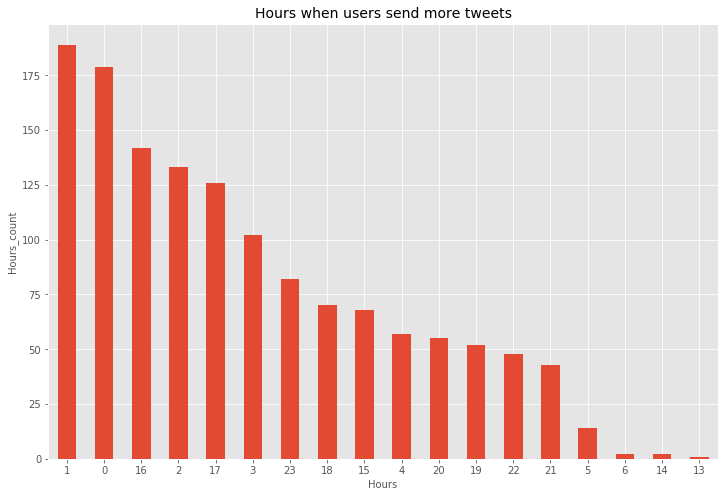

In [67]:
funct.simple_plot(twitter_archive_master,
                  'hour',
                  "Hours when users send more tweets",
                  'Hours',
                  'Hours_count') 

### How accurate is the prediction

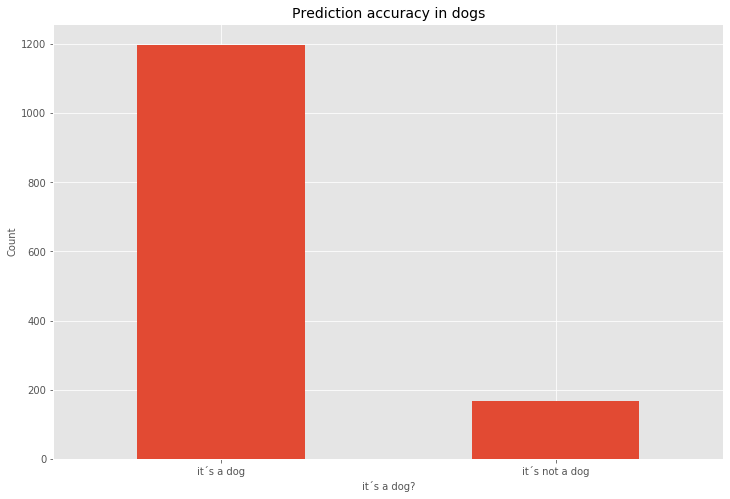

In [68]:
funct.simple_plot(twitter_archive_master,
                  'is_dog',
                  "Prediction accuracy in dogs",
                  'it´s a dog?',
                  'Count')  

### Most used sources

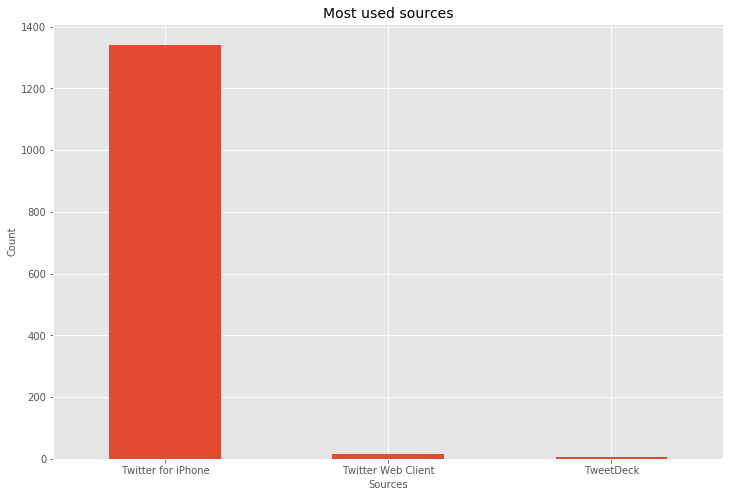

In [69]:
funct.simple_plot(twitter_archive_master,
                  'source',
                  "Most used sources",
                  'Sources',
                  'Count')

### dog stages with more occurrences

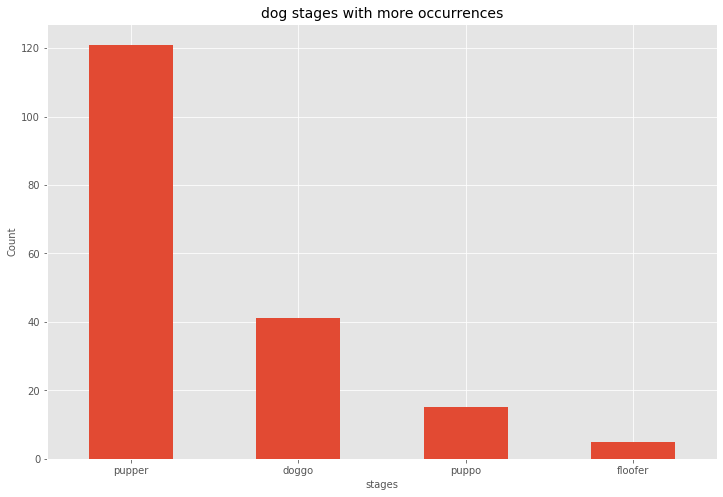

In [70]:
funct.simple_plot(twitter_archive_master,
                  'dog_stages',
                  "dog stages with more occurrences",
                  'stages',
                  'Count')

### Top 10 most favorite dogs

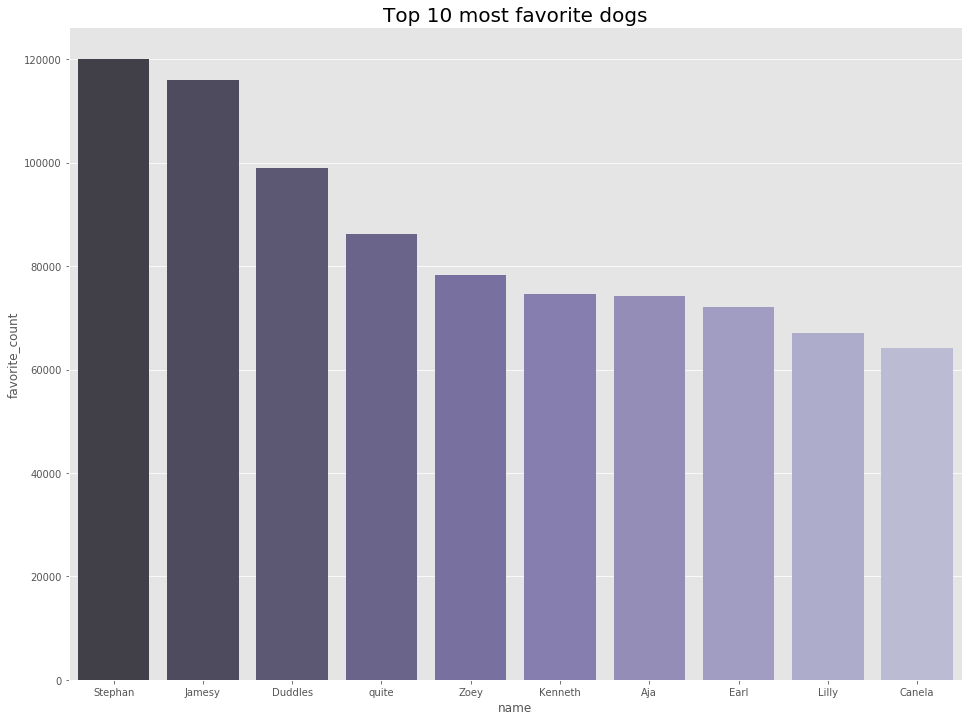

In [71]:
funct.top_plot(twitter_archive_master, 'name', 'favorite_count', 'Top 10 most favorite dogs', 10)

### Top 10 most retweets dogs

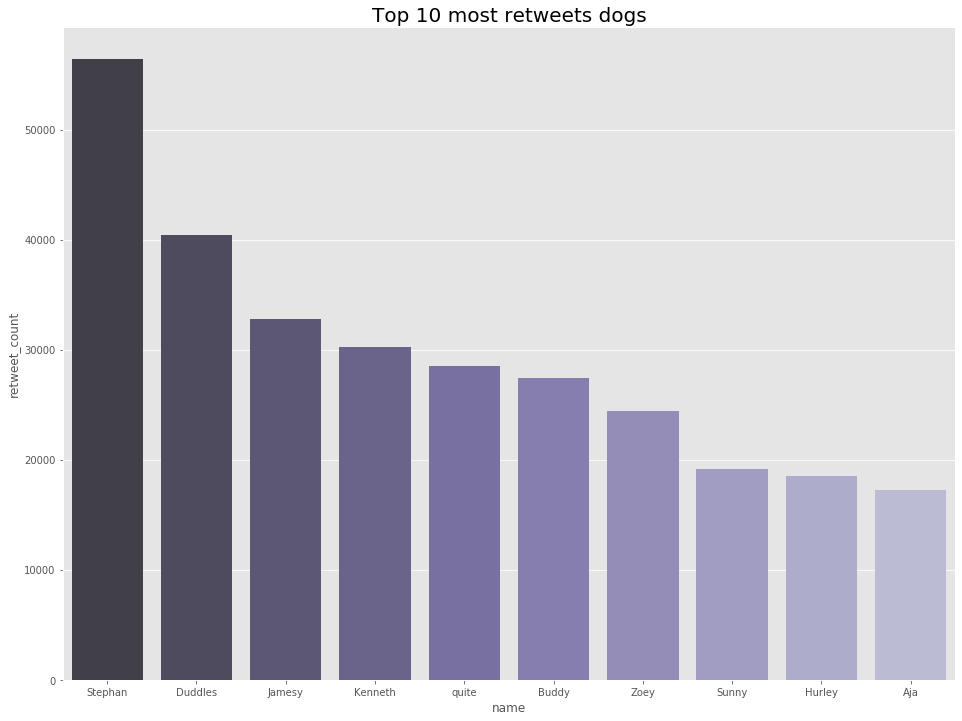

In [72]:
funct.top_plot(twitter_archive_master, 'name', 'retweet_count', 'Top 10 most retweets dogs', 10)


### Top 20 dogs with highest rating

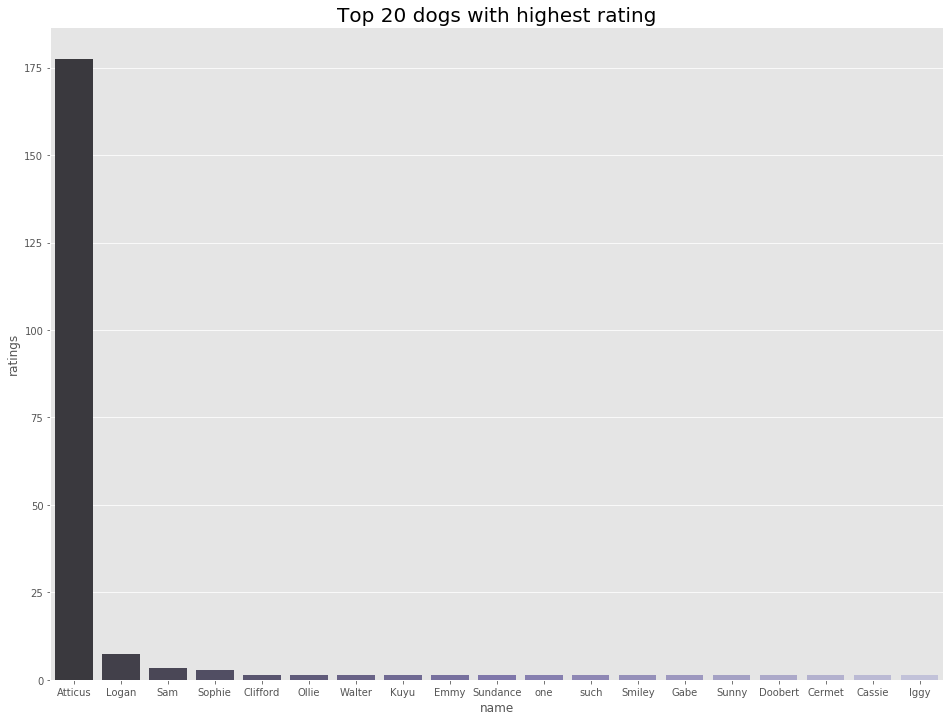

In [73]:
funct.top_plot(twitter_archive_master, 'name', 'ratings', 'Top 20 dogs with highest rating', 20) 

# Save csv

In [74]:
twitter_archive_master.to_csv('../data/twitter_archive_master.csv', index = False)